# Mercari's Price Suggestion and Modelling

**Mercari** is an online shopping marketplace which is powered by one of the biggest community of Japan where users can sell pretty much anything.The community wants to offer price suggestions to the sellers but is a tough task as the sellers are enabled to put just about anything, or any bundle of things, on Mercari’s marketplace.


### Problem Statement:
- It can be hard to know how much something’s really worth. Small details can mean big differences in pricing. For example, one of these sweaters cost 335 dollars and the other cost 9.99 dollars. Can you guess which one’s which?

**Sweater A:** Vince, Long sleeve, Turtle neck pullover sweater, Black, Size L, Great condition

**Sweater B:** St. John's Bay Long sleeve, Turtle neck Pullover sweater, Size L, Great condition

- Hence, it's harder to guess or decide what price which product should have

- Product pricing gets even harder at scale, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.



### Challenges to Solve:

- Given details about a product like product category name, brand name, and item condition, our challenge is to build an algorithm that automatically suggests the right product prices

- But if solved rightly, it can eliminate human interference in giving price suggestions of a product and speed up efficiency of the shopping app. That’s when Machine Learning comes to play.

- The task of this Project is to build an algorithm that suggests the right product prices for shopping app from product name, user inputted text descriptions of the product, category name, brand name, item condition, and shipping information.

- The goal is about creating a model that would help sellers to price their products.Pricing should be intermediate between sellers and buyers.


### Our Objectives:

1. • Data Cleaning
    • Pre-processing
	• Feature Engineering 
2. Exploratory Data Analysis:
    - Gathering as many insights as possible through Exploratory Data Analysis. 
    - Trying to see through Descriptive Statistics that what our data is trying to tell us and understand the significance of each and every variable. 
3. Text Processing:
    - Natural Language Processing (NLP)
    - Tokenizing and tf-idf algorithm
    - K-means Clustering
5. The given problem is exactly about predicting the price, which is a real-valued value, thus it falls into the Regression Category
5. Trying to provide some interpretability and evolving our ways to handle the upcoming problems as we proceed through our project


### Models used in the Project:
1. Ordinary Least Squares Regression
2. Linear Regression 
3. Ridge Regression  
4. Stochastic Gradient Descent Regressor     
5. Random Forest Regressor


## Data Description:

- `train_id` - the id of the product 

- `name` - the name of the product

- `item_condition_id` - the condition of the product provided by the seller
    
 According to information available on Mercari Website
    - 1 stands for new
    - 2 stands for fairly new
    - 3 stands for Good
    - 4 stands for Bad
    - 5 stands for Very Poor
    

- `category_name` - category of the product

- `brand_name` - brand name of the product

- `price` - the price that the product was sold for. (This is the target variable that we will predict) The unit is USD

- `shipping` - 1 if shipping fee is paid by seller and 0 by buyer

- `item_description` - the full description of the item


**Independent variables:** `train_id, name, item_condition_id, category_name, brand_name, shipping, item_description`

**Target Variable:** `price`

We will build various supervised machine learning regression models and see which succeeds in solving the given mapping between the input variables and the price feature in the best way. Let’s begin in a step-by-step manner


## Step 1: Exploratory Data Analysis
- The very first step in solving any case study in data science is to properly look and analyze the data you have. 
- It helps to give valuable insights into the pattern and information it has to convey. 
- Statistical tools have a big role in proper visualization of the data. 
- Even though it is considered not a very important part of solving a problem, but successful data scientists and ML engineers spend maximum part of solving a problem by analyzing the data they have. 
- Proper EDA gives interesting features of your data which in turn influences our data preprocessing and model selection criterion as well.

#### Importing the libraries:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import warnings  
warnings.filterwarnings('ignore') # to ignore the warnings

#### Loading the data:

In [4]:
data = pd.read_csv('../input/mercari-dataset/train2.csv', encoding='latin1')
# As most of the words are from Western European Language hence encoding='latin1'
# Latin-1, also called ISO-8859-1, is an 8-bit character set endorsed by the 
# International Organization for Standardization (ISO) and represents the alphabets 
# of Western European languages. As its name implies, it is a subset of ISO-8859, 
# which includes several other related sets for writing systems like Cyrillic, Hebrew, and Arabic. 
# It is used by most Unix systems as well as Windows. DOS and Mac OS, however, use their own sets.

In [5]:
data.head()

train_id                                      name  item_condition_id  \
0         0                      Hero 77 fountain pen                  2   
1         1                  14K Yellow Gold Earrings                  3   
2         2  New balance 2-in 1 size S dry fit shorts                  2   
3         3   Zella black workout tank w mesh cut out                  3   
4         4       NWT Lilly Pulitzer gabby dress sz 8                  1   

                          category_name      brand_name  price  shipping  \
0         Other/Office supplies/Writing             NaN   12.0         1   
1                Women/Jewelry/Earrings             NaN   20.0         0   
2         Women/Athletic Apparel/Shorts     New Balance   10.0         0   
3  Women/Athletic Apparel/Shirts & Tops           Zella   15.0         1   
4        Women/Dresses/Above Knee, Mini  Lilly Pulitzer   75.0         0   

                                    item_description  
0  For sale a brand new Hero 77 fountain pen, doe...  
1  14k black Onyx earrings Good condition Final sale  
2  Brand new never worn, but I tore the tag off w...  
3       Zella black workout tank with mesh cut outs.  
4                            New with tags!! Size 8.

In [6]:
# Data Dimensions
data.shape

(148253, 8)

`As the orignal data had over 1.4 million observations, we only take the 10% out of it in the csv file above`

In [7]:
# Data Types
data.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [8]:
# Columns in the data
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [9]:
# Checking the NAs in the data
data.isnull().sum()

train_id                 0
name                     0
item_condition_id        0
category_name          641
brand_name           62991
price                    0
shipping                 0
item_description         0
dtype: int64

In [10]:
# making a copy of the data as backup
data1 = data.copy()

#### Handling missing values:

In [11]:
for value in ['category_name']:
    data1[value].fillna(value='Other', inplace=True) 
    # replacing by "Other" because there already exists a category by the same name

for value in ['brand_name']:
    data1[value].fillna(value='Unknown', inplace=True)

# Rechecking the null values
data1.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

## Analysis on each Variable:
### 1. Price:

In [33]:
data1.price.describe()

count    148253.000000
mean         26.807933
std          39.358186
min           0.000000
25%          10.000000
50%          17.000000
75%          29.000000
max        2000.000000
Name: price, dtype: float64

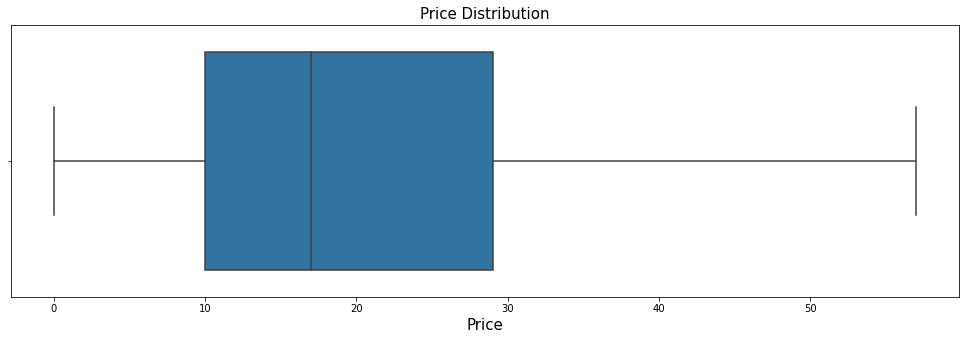

In [34]:
plt.figure(figsize=(17,5))
plt.title('Price Distribution', fontsize=15)
sns.boxplot(data1.price, showfliers=False)
plt.xlabel('Price',fontsize=15)

plt.show()

**Insight 1 from Price**
- mean = 26, median = 17, min = 0, max = 2000
- 25% of the products are priced below 10 dollars
- 50% of products are priced below 17 dollars
- 75% of products are priced below 29 dollars
- Also, the maximum price that any product has is 2000 dollars

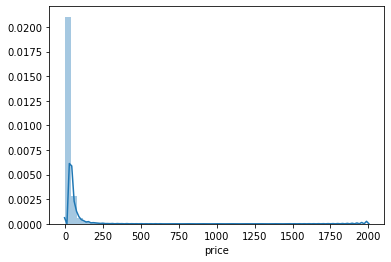

In [35]:
plt.plot(figsize=(30,20))
sns.distplot(data1['price'])

- It can be concluded that the distribution of the `price` variable is heavily right-skewed.
- The `price` variable follows a skewed distribution and in order to make errors on low price product more relevant than for higher prices, we take the log transform
- log1p = log(p) + 1, we add 1  to avoid zero(log0=infinity) and negative values

Our dependent variable should be normally distributed i.e. The Assumption of Normality should be satisfied

**Let's compare both the graphs side by side**

Text(0.5, 1.0, 'Price Distribution')

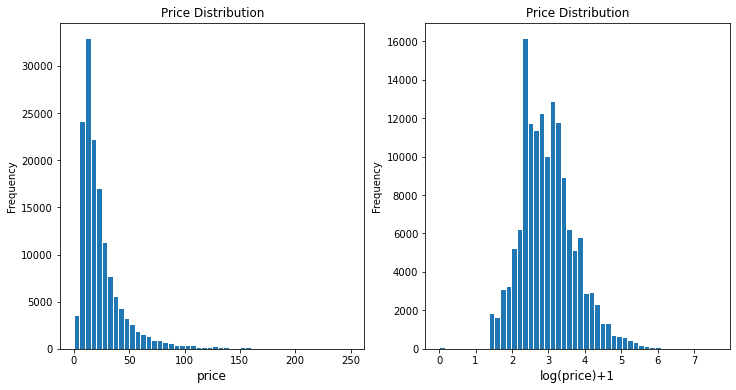

In [36]:
plt.subplot(1, 2, 1)
(data1['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

plt.subplot(1, 2, 2)
np.log1p(data1['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor='white')
plt.xlabel('log(price)+1', fontsize=12)
plt.title('Price Distribution', fontsize=12)

### 2. Shipping:

In [37]:
data1['shipping'].value_counts(normalize=True) # to show as a percentage of total values

0    0.553587
1    0.446413
Name: shipping, dtype: float64

Text(0.5, 1.0, 'Analysis on Shipping Paid')

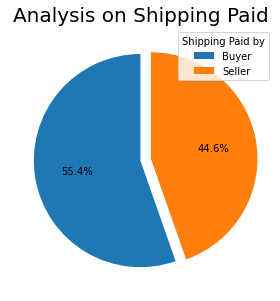

In [38]:
index = ['Buyer','Seller']
values =  data1['shipping'].value_counts()
plt.figure(figsize=(7,4))
plt.pie(values,startangle=90,autopct='%0.1f%%',explode=(0,0.1))
plt.legend(title = "Shipping Paid by",loc = "upper right",labels= index,fontsize=10)
plt.tight_layout()
plt.title("Analysis on Shipping Paid",fontsize=20)

**Insight 1 from shipping:**
- `0`- 82071 times (buyer charged) `55.53%`
- `1`- 66182 times(seller charged) `44.64%`
- Over 55% of items' shipping fee were paid by the buyers

**Suggestion to the seller:**

- The above insight matches with our perception that the sellers need to keep a lower price to compensate for the additional shipping

#### To check how shipping is related to the price:

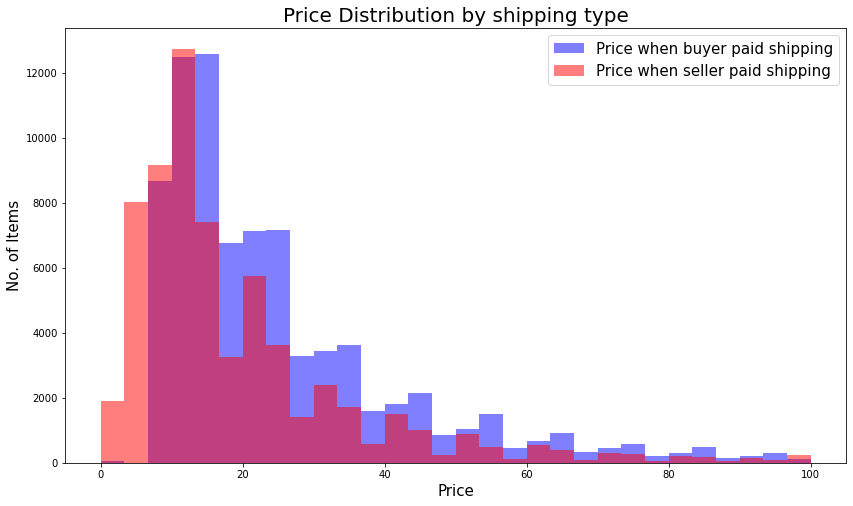

In [39]:
buyer_charged = data1.loc[data1['shipping'] == 0, 'price']
seller_charged = data1.loc[data1['shipping'] == 1, 'price']


fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(buyer_charged, bins=30, range=[0, 100], label='Price when buyer paid shipping', alpha=0.5, color='b')
ax.hist(seller_charged, bins=30, range=[0, 100], label='Price when seller paid shipping', alpha=0.5, color='r')
plt.title('Price Distribution by shipping type', fontsize = 20)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('No. of Items', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

**Insight 2 from shipping:**
- The price when buyer pays is high compared to when seller pays

Chekcing the Actual values - 

In [40]:
# average price for shipping for seller and buyer
print('The average price is {}'.format(round(seller_charged.mean(), 2)), 'if seller pays shipping')
print('The average price is {}'.format(round(buyer_charged.mean(), 2)), 'if buyer pays shipping')

The average price is 22.82 if seller pays shipping
The average price is 30.02 if buyer pays shipping


### 3. Category Name:
Unique Category Names

In [41]:
print('There are', data1['category_name'].nunique(), 'unique values in category name column')

There are 1052 unique values in category name column


Top 10 most common category names

In [42]:
data1['category_name'].value_counts()[:10]

Women/Athletic Apparel/Pants, Tights, Leggings                 6049
Women/Tops & Blouses/T-Shirts                                  4686
Beauty/Makeup/Face                                             3429
Beauty/Makeup/Lips                                             3025
Electronics/Video Games & Consoles/Games                       2587
Beauty/Makeup/Eyes                                             2560
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    2464
Women/Underwear/Bras                                           2088
Women/Tops & Blouses/Blouse                                    2073
Women/Dresses/Above Knee, Mini                                 2029
Name: category_name, dtype: int64

**General Observations from the above insights:**
    
- It is seen in this table that a subcategory in the category name is seperated by a slash "/"
- For ex. Beauty/Makeup/Face and Beauty/Makeup/Lips

- This means `Beauty` category has a subcategory `MakeUp` and this sub category `MakeUp` is further divided into `Face` and `Lips`

- It is also observed that `Women` apparel has the maximum number of items followed by any other category.
- The category names are listed by ‘/’ delimiter which tells about the main category, sub-category 1 and sub-category 2 of the products. 
- Therefore, to get better idea of each product, we will do feature engineering here and split the category name into 3 different columns namely, ‘Main_categ’, ‘sub_categ1’ and ‘sub_categ2’.


**Divide category names into Main category, Sub-category 1 and Sub-category 2:**

In [12]:
temp = data1[data1['brand_name']!='Unknown'] # remove Unknown coz it represents missing values
data1[['Main_categ','sub_categ1','sub_categ2']] = data1.category_name.str.split("/",expand = True,n= 2)
for i in ['sub_categ1','sub_categ2']:
    data1[i].fillna(value = "Label not given", inplace=True)

After splitting the `category_name` column, the unique items that I have in each of the newly formed columns is listed below:

In [13]:
print('There are', data1['Main_categ'].nunique(), 'unique values in Main category')
print('There are', data1['sub_categ1'].nunique(), 'unique values in Sub-category 1')
print('There are', data1['sub_categ2'].nunique(), 'unique values in Sub-category 2')

There are 10 unique values in Main category
There are 114 unique values in Sub-category 1
There are 741 unique values in Sub-category 2


### 3.1 Main Category:

Let’s find out which of the products rank the highest in terms of frequency of occurrence:

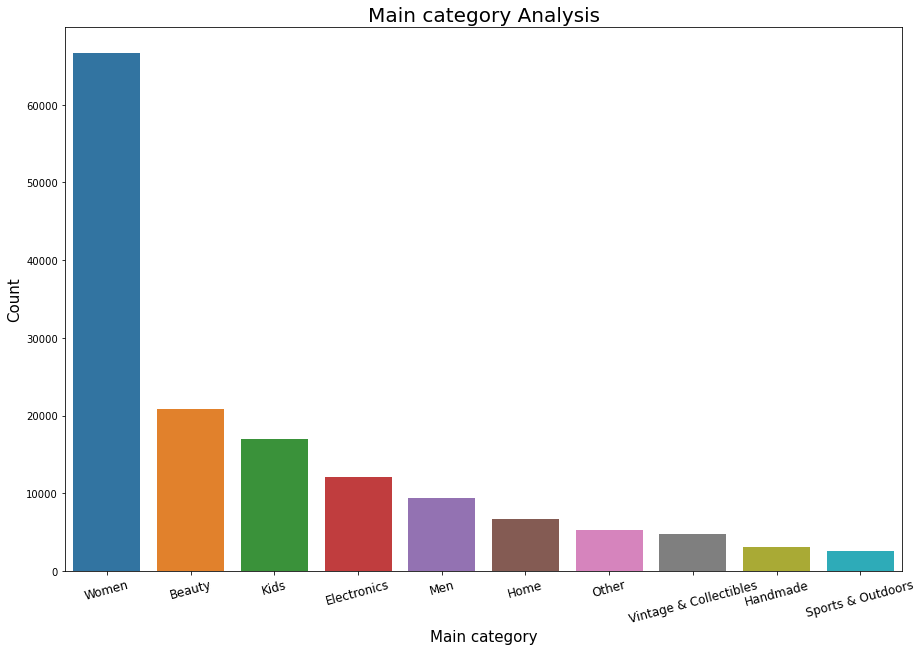

In [45]:
maincat_count = data1.Main_categ.value_counts()

plt.figure(figsize=(15, 10))
sns.barplot(maincat_count.index[0:11], maincat_count[0:11])
plt.title('Main category Analysis',fontsize = 20)
plt.xlabel('Main category',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.xticks(rotation=15, fontsize=12)
plt.show()

**Insight 1 from Main Category:**
- It can be said that `Women` products occur with the maximum frequency, followed by `Beauty` products. The 3rd largest general category is owned by `Kids` products

### Main category vs Price:

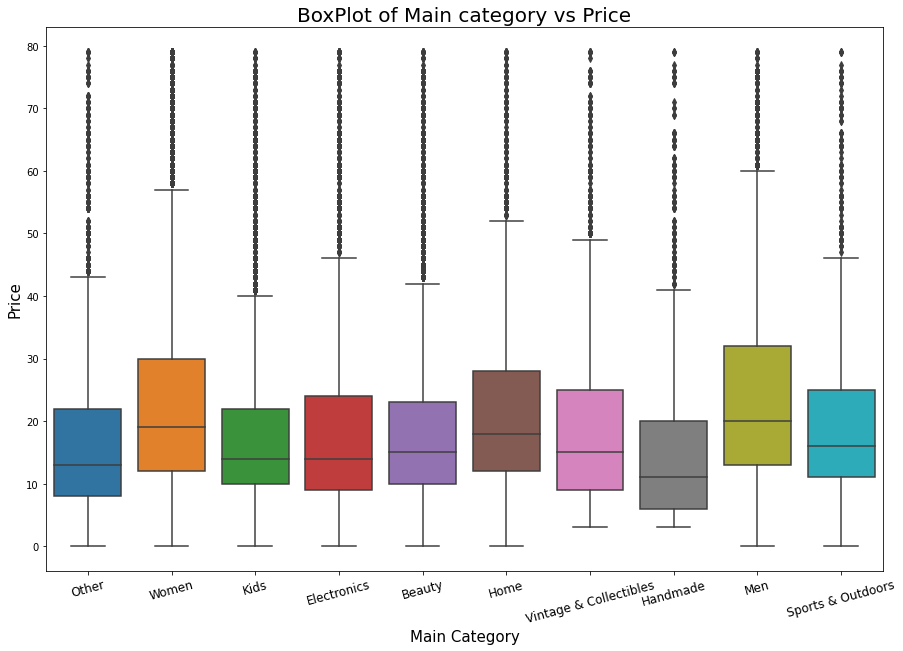

In [46]:
temp = data1[data1['price'] < 80]
plt.figure(figsize=(15, 10))
sns.boxplot(temp['Main_categ'], temp['price'])
plt.title('BoxPlot of Main category vs Price', fontsize = 20)
plt.xlabel('Main Category',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.xticks(rotation = 15, fontsize=12)
plt.show()

In [47]:
temp.groupby(['Main_categ'])['price'].agg('median')

Main_categ
Beauty                    15.0
Electronics               14.0
Handmade                  11.0
Home                      18.0
Kids                      14.0
Men                       20.0
Other                     13.0
Sports & Outdoors         16.0
Vintage & Collectibles    15.0
Women                     19.0
Name: price, dtype: float64

**Insight 2 from Main category:**

- Although there are maximum products purchased in the `Women's` category, the price of `Men` category products(20 dollars) is almost as expensive as the products in `Women` category(19 dollars)

### Sub-category 1:
As there are 114 unique sub categories, we won't be able to plot them all, hence, first we need to seperate the top 10 Sub-categories

In [48]:
index = []
[index.append(key) for key, value in Counter(data1['sub_categ1']).most_common()]
top_10 = index[:10]
temp = data1[data1['sub_categ1'].isin(top_10)] 
# the corresponding top 10 indexes get their corresponding names from "sub_categ1"

Text(0, 0.5, 'Frequency')

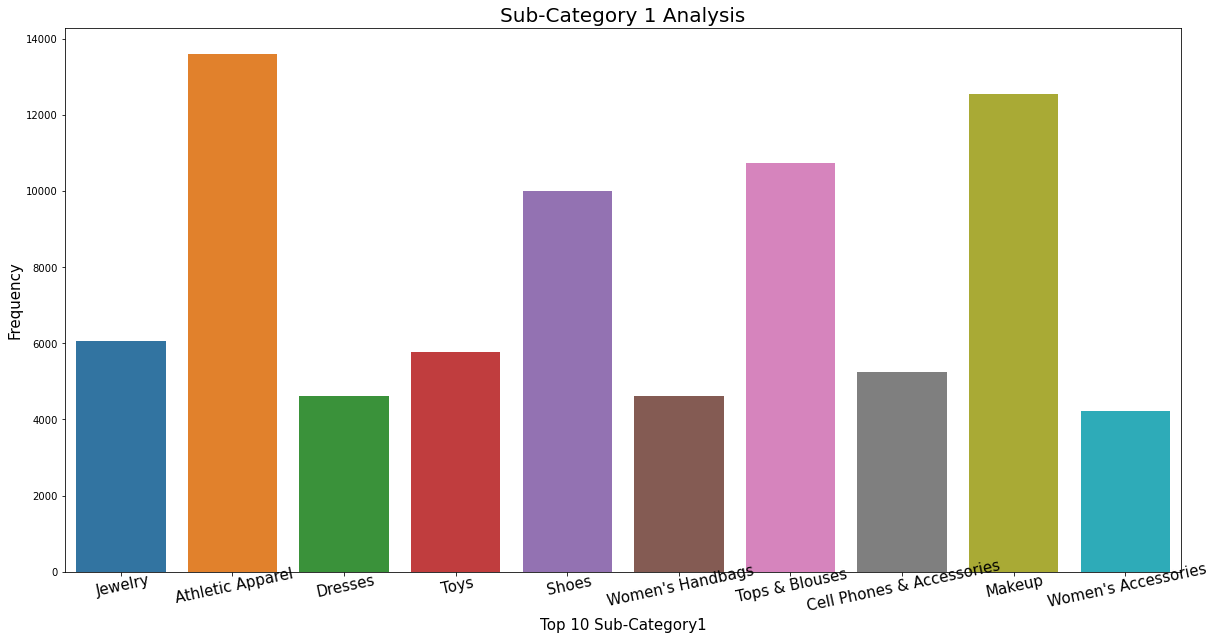

In [49]:
plt.figure(figsize=(20,10))
sns.countplot(temp['sub_categ1'])
plt.title('Sub-Category 1 Analysis',fontsize = 20)
plt.xticks(rotation = 12,wrap = True,fontsize = 15)
plt.xlabel('Top 10 Sub-Category1',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)

**Insight 1 from Sub-category 1:**

- Most of the products from Sub-category 1 are bought from `Athletic Apparel` and `Makeup` category 

### Sub-category 1 vs Price: 

Text(0, 0.5, 'Price')

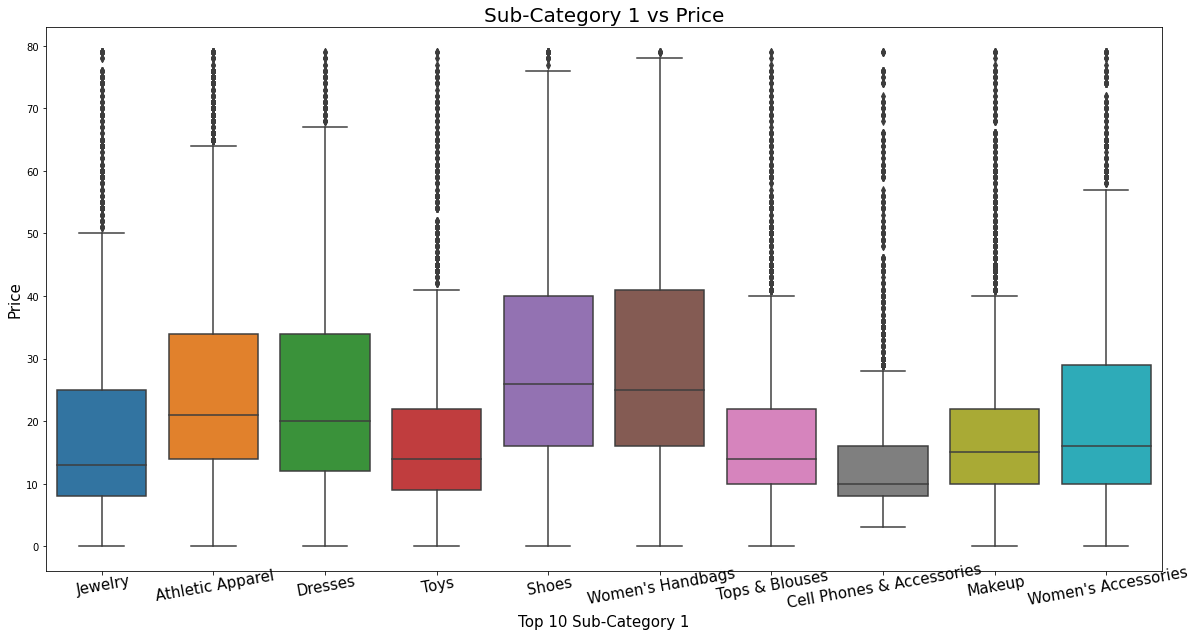

In [50]:
temp2 = temp[temp['price']<80] # box plot
plt.figure(figsize=(20,10))
sns.boxplot(temp2['sub_categ1'],temp2['price'])
plt.title('Sub-Category 1 vs Price',fontsize = 20)
plt.xticks(rotation = 10,wrap = True,fontsize = 15)
plt.xlabel('Top 10 Sub-Category 1',fontsize = 15)
plt.ylabel('Price',fontsize = 15)

In [51]:
temp2.groupby(['sub_categ1'])['price'].agg('median')

sub_categ1
Athletic Apparel             21.0
Cell Phones & Accessories    10.0
Dresses                      20.0
Jewelry                      13.0
Makeup                       15.0
Shoes                        26.0
Tops & Blouses               14.0
Toys                         14.0
Women's Accessories          16.0
Women's Handbags             25.0
Name: price, dtype: float64

**Insight 2 from Sub-category 1:**

- Products in `Shoes` category is more expensive than `Women's Handbag` by 1 dollar
- Products in `Women's Handbag` category is more expensive thus has low frequency 
- Hence its satisfies the logic that Expensive products are bought less number of times

### 3.3 Sub-category 2:

Text(0, 0.5, 'Frequency')

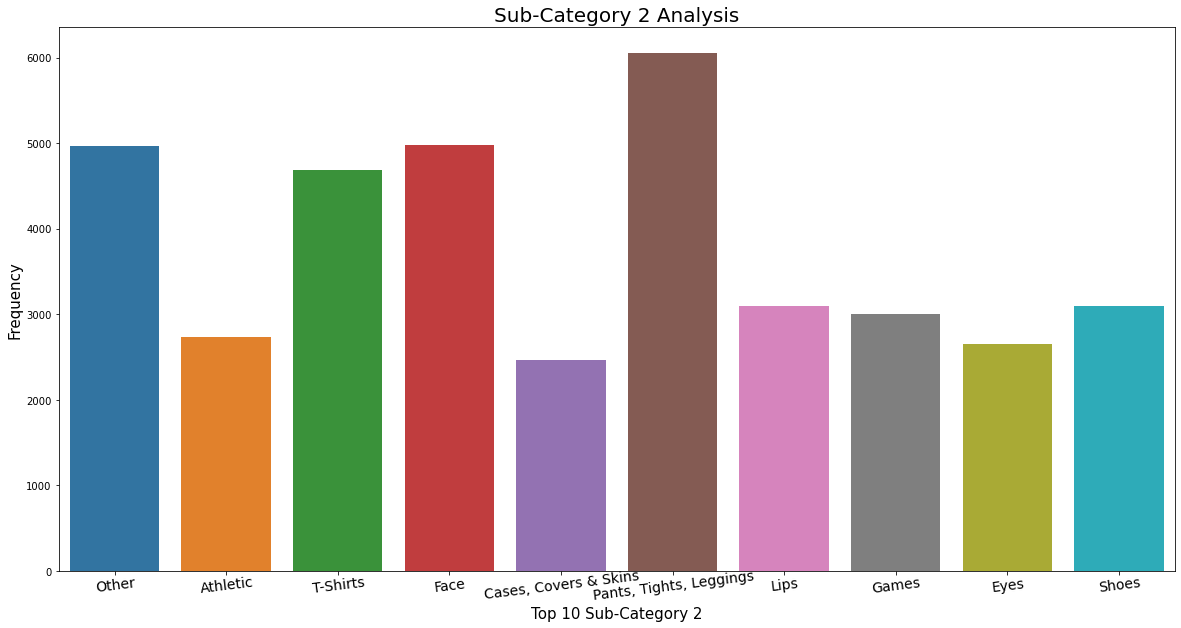

In [52]:
index = []
[index.append(key) for key, value in Counter(data1['sub_categ2']).most_common()]
top_10 = index[:10]
temp = data1[data1['sub_categ2'].isin(top_10)]

plt.figure(figsize=(20,10))
sns.countplot(temp['sub_categ2'])
plt.title('Sub-Category 2 Analysis',fontsize = 20)
plt.xticks(rotation = 7,wrap = True,fontsize = 14)
plt.xlabel('Top 10 Sub-Category 2',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)

**Insight 1 from Sub-category 2:**

- Products under category `Pants,Tights,Leggings` are bought the highest number of times

### Sub-category 2 vs Price:

Text(0, 0.5, 'Price')

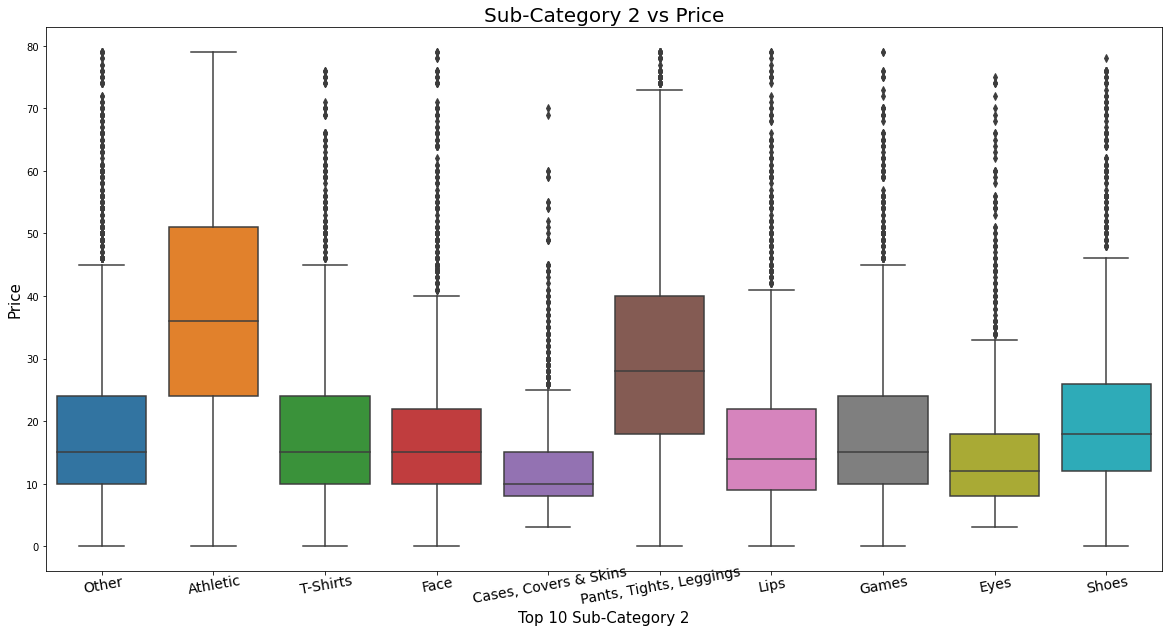

In [53]:
temp2 = temp[temp['price']<80]
plt.figure(figsize=(20,10))
sns.boxplot(temp2['sub_categ2'],temp2['price'])
plt.title('Sub-Category 2 vs Price', fontsize = 20)
plt.xticks(rotation = 10,wrap = True,fontsize = 14)
plt.xlabel('Top 10 Sub-Category 2', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

In [54]:
temp2.groupby(['sub_categ2'])['price'].agg('median')

sub_categ2
Athletic                   36.0
Cases, Covers & Skins      10.0
Eyes                       12.0
Face                       15.0
Games                      15.0
Lips                       14.0
Other                      15.0
Pants, Tights, Leggings    28.0
Shoes                      18.0
T-Shirts                   15.0
Name: price, dtype: float64

**Insight 2 from Sub-Category 2:**

- Yet again products in the `Athletic` category are bought moderately as they are expensive
- Products in `Pants,Tights,Leggings` category are bought more as moderately expensive

### 4. Brand Name:

In [55]:
print('There are', data1['brand_name'].nunique(), 'unique values in brand name column')

There are 2321 unique values in brand name column


As there are 2321 unique brand names, we lookout only for products purchased from the top 10 frequently occuring brands

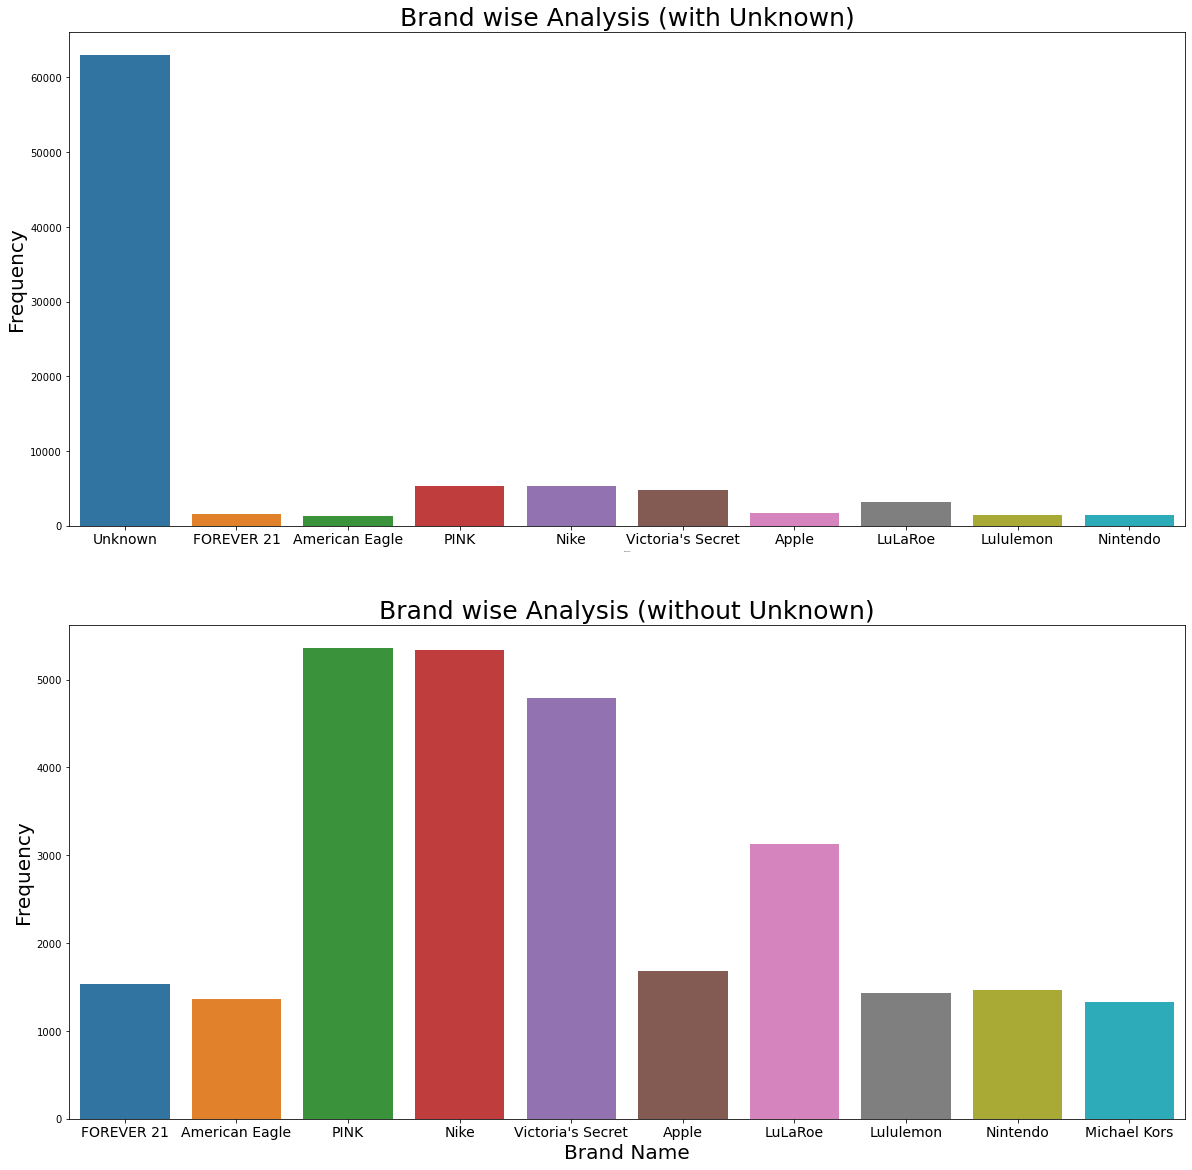

In [56]:
index = []
[index.append(key) for key, value in Counter(data1['brand_name']).most_common()]
top_10 = index[:10]
temp = data1[data1['brand_name'].isin(top_10)]

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.countplot(temp['brand_name'])
plt.title('Brand wise Analysis (with Unknown)', fontsize = 25)
plt.xticks(rotation = 0,wrap = True,fontsize = 14)
plt.xlabel('Brand Name',fontsize = 0)
plt.ylabel('Frequency', fontsize = 20)

temp = data1[data1['brand_name']!='Unknown']
index = []
[index.append(key) for key, value in Counter(temp['brand_name']).most_common()]
top_10 = index[:10]
temp2 = temp[temp['brand_name'].isin(top_10)]

plt.subplot(2,1,2)
# plt.figure(figsize=(40,20))
sns.countplot(temp2['brand_name'])
plt.title('Brand wise Analysis (without Unknown)', fontsize = 25)
plt.xticks(rotation = 0,wrap = True,fontsize = 14)
plt.xlabel('Brand Name',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.show()

**Insight 1 from Brand name:**

- We ignore the Brand name marked as `Unknown` as it represents our missing values
- Hence we make the graph again without considering the `Unknown`
- We observe that `Pink`, `Nike`, and `Victoria's Secret` are top 3 most purchased brands
- Also it is obvious that `Pink` and `Victoria's Secret` brand products are mostly bought from `Women` main category more frequently

### Brand name vs Price:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

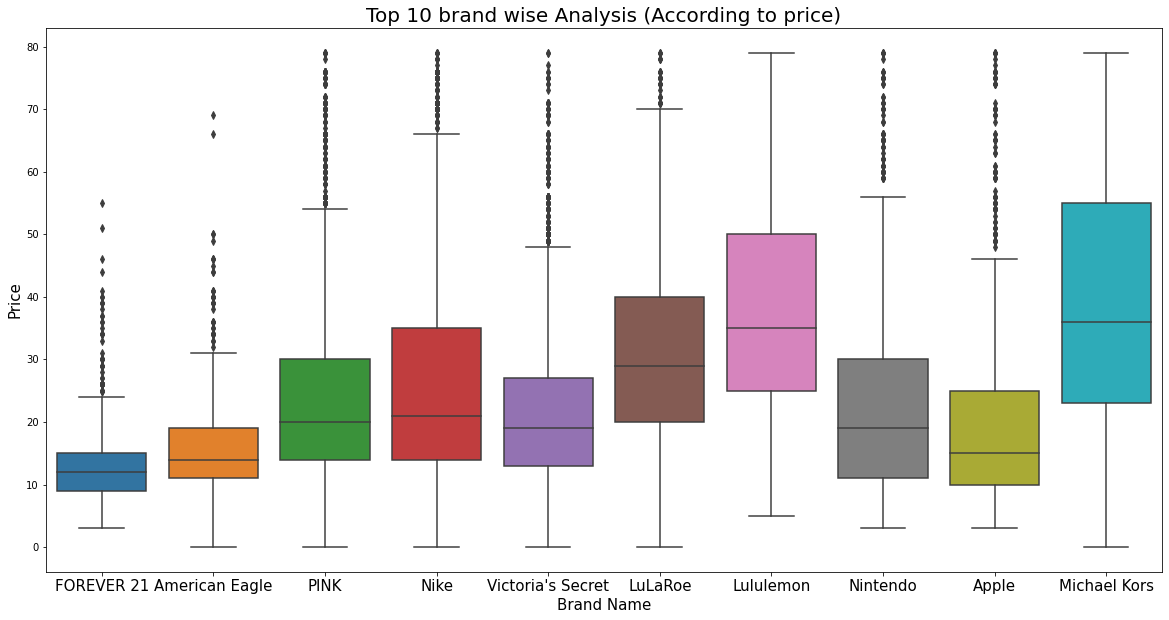

In [57]:
temp3 = temp2[temp2['price']<80]
plt.figure(figsize=(20,10))
sns.boxplot(temp3['brand_name'],temp3['price'])
plt.title("Top 10 brand wise Analysis (According to price)",fontsize=20)
plt.xlabel("Brand Name",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xticks(rotation = 0,wrap = True,fontsize = 15)

In [58]:
temp3.groupby(['brand_name'])['price'].agg('median')

brand_name
American Eagle       14.0
Apple                15.0
FOREVER 21           12.0
LuLaRoe              29.0
Lululemon            35.0
Michael Kors         36.0
Nike                 21.0
Nintendo             19.0
PINK                 20.0
Victoria's Secret    19.0
Name: price, dtype: float64

**Insight 2 from Brand name:**

- `Michael Kors` products cost high hence less bought
- `Lululemon` has the 2nd highest median price 
- `Pink`, `Nike` and `Victoria's Secret` products have moderate pricing hence are more frequently bought

### 5. Item Description:

First we create a function to return us a count of words from each Description

In [59]:
def length(description):
    count = 0
    for i in description.split():
        count+=1
    return count

Then we create a series which has the description and the length of description in words

In [60]:
lol=[]
for i in data1['item_description']:
    temp=[]
    temp.append(i)
    temp.append(length(str(i)))
    lol.append(temp)

Printing first three rows to check the string and the number of words in the string match or not

In [61]:
print(lol[0:3])

[['For sale a brand new Hero 77 fountain pen, does not include the ink.', 14], ['14k black Onyx earrings Good condition Final sale', 8], ['Brand new never worn, but I tore the tag off when I tried them on. Double layer spandex shorts to keep you dry and covered!', 25]]


Making a new dataframe of the series we created - `lol`

In [62]:
mydf = pd.DataFrame(lol, columns=['Description', 'Description_length'])
print(mydf.head(2))

                                         Description  Description_length
0  For sale a brand new Hero 77 fountain pen, doe...                  14
1  14k black Onyx earrings Good condition Final sale                   8


Adding only 2nd coloumn `Description_length` from mydf to data1

In [63]:
data1['Description_length'] = mydf['Description_length']

Text(0, 0.5, 'Frequency')

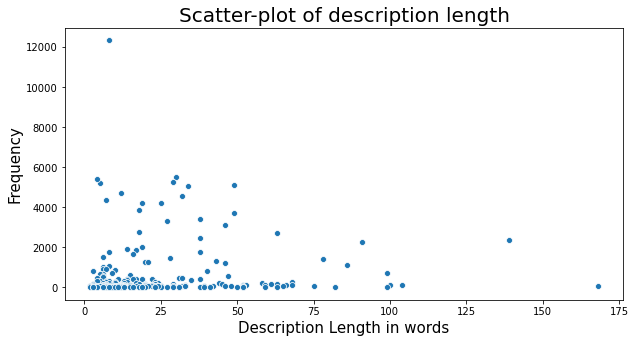

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data1.Description_length, y=data1.Description_length.value_counts())
plt.title('Scatter-plot of description length',fontsize=20)
plt.xlabel("Description Length in words",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

**Insight 1 from Item Description:**

- Most of the item descriptions are written in the range of 3-50 words

### Item Description vs Price:

Text(0, 0.5, 'Price')

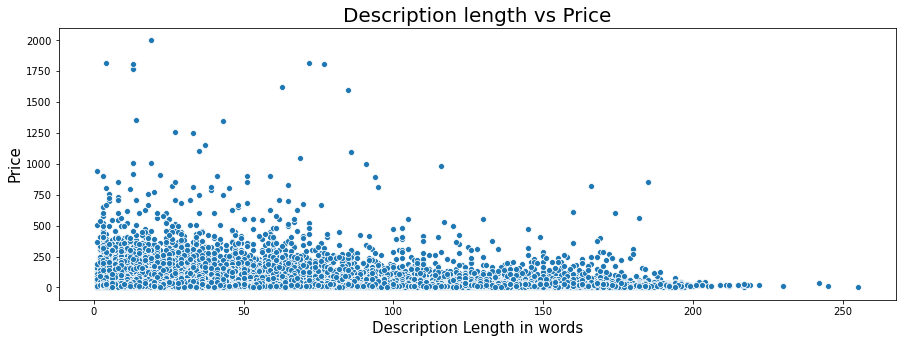

In [65]:
temp4=data1[data1['Description_length']<500]
plt.figure(figsize=(15,5))
sns.scatterplot(x=temp4['Description_length'], y=data1.price)
plt.title('Description length vs Price',fontsize=20)
plt.xlabel("Description Length in words",fontsize=15)
plt.ylabel("Price",fontsize=15)

**Insight 2 from Item Description:**
    
- As the item description gets longer the price starts decreasing

**Let us check what length of item description occurs the most**

In [66]:
desc_len_count = data1.Description_length.value_counts()
print(desc_len_count[0:3])

3    12346
6     5503
7     5423
Name: Description_length, dtype: int64


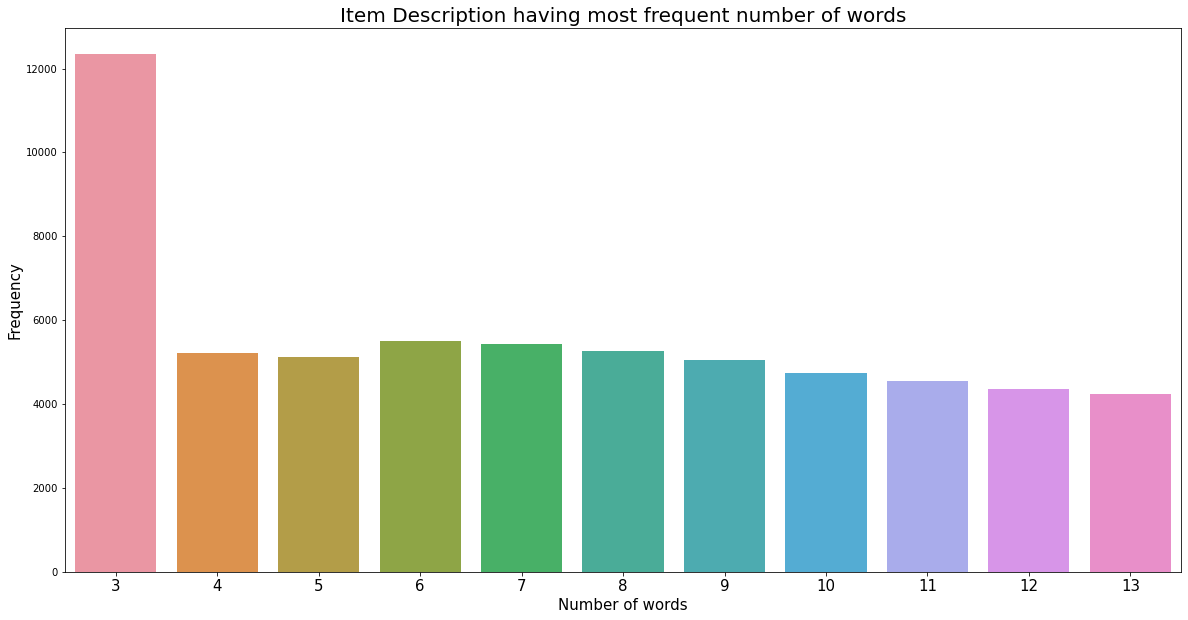

In [67]:
plt.figure(figsize=(20, 10))
sns.barplot(desc_len_count.index[0:11], desc_len_count[0:11])
plt.title('Item Description having most frequent number of words',fontsize=20)
plt.xticks(rotation = 0,wrap = True,fontsize = 15)
plt.xlabel('Number of words',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

**Insight 3 from Item Description:**

- This tells us that there are a lot of item descriptions having 3 words in it
- The item descriptions with shorter length are siginificantly higher than longer description lengths

# Text Processing:

Most of the time, the first steps of an NLP project is to "tokenize" your documents, which main purpose is to normalize our texts. The three fundamental stages will usually include:

- break the descriptions into sentences and then break the sentences into tokens
- remove punctuation and stop words
- lowercase the tokens


### Wordcloud for Item Description:
To check frequently occuring most **important words** in the description

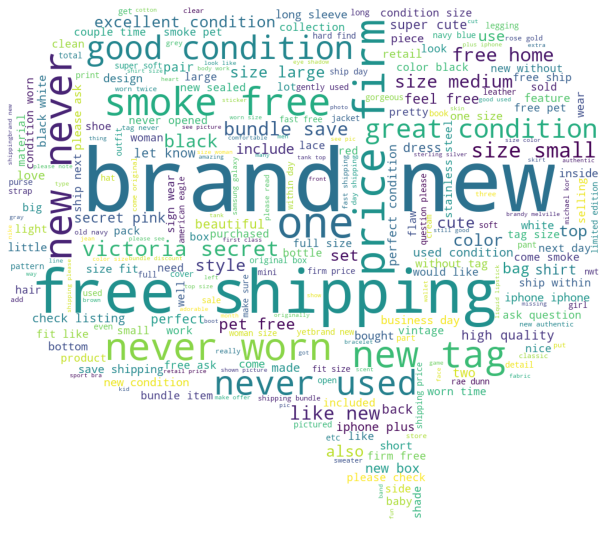

In [68]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from PIL import Image

# checking length of stop words
len(stopwords)
from string import punctuation
punctuation = list(punctuation)
stopwords.update(punctuation)
# adding punctuation to stopwords


# wordcloud for Item Description variable with 500 most occuring words
doc1 = []
for i in range(0,data1.shape[0]):
    text = str(data1["item_description"][i])
    text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords and len(word)>2]
    text = " ".join(text)
    doc1.append(text)

# join string
doc2 = "".join(doc1)


# wordcloud visualization
img = np.array(Image.open("../input/images/proj images/cmt.png")) 
wordcloud = WordCloud(width=1000,height= 500,relative_scaling=1.0,mask=img,max_words=1000,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(doc2)

plt.figure(figsize=(15,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### WordCloud for Item Description of Top 6 Categories

In [69]:
from nltk.corpus import stopwords
from PIL import Image
stp=set(stopwords.words('english'))
j=0
plt.figure(figsize=(8,10))
for i in data1["Main_categ"].value_counts().index[:6]:
    text = data1.loc[data1["Main_categ"] == str(i)]["item_description"]
    # text = data1.loc[data1['main_category']==str(i)]
    # text = text['item_description']
    text = "".join(text)
    mask = np.array(Image.open('../input/images/proj images/'+str(i)+'.png'))
    wordcloud = WordCloud(width=2000, height=1500, relative_scaling=1.0, max_words=100, mask=mask,
                          background_color='white',
                          stopwords=stp,
                          min_font_size=10,).generate(text)
# # With relative_scaling=1, a word that is twice as frequent will have twice the size. 
# # If you want to consider the word frequencies and not only their rank, relative_scaling around .5 often looks good. 
# # If ‘auto’ it will be set to 0.5 unless repeat is true, in which case it will be set to 0.    
    
#     # plot the WordCloud image
    if j < 6:
        j = j + 1
        plt.subplot(3,2,j)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

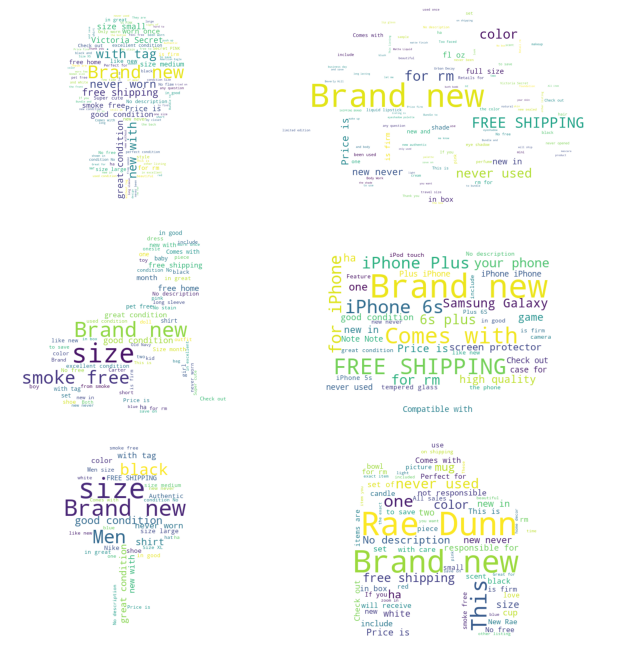

## Interactive Clustering graph with bokeh library:

### Step 1- Pre-Processing: tf-idf
tf-idf is the acronym for Term Frequency–inverse Document Frequency. It quantifies the importance of a particular word in relative to the vocabulary of a collection of documents or corpus. The metric depends on two factors:

Term Frequency: the occurences of a word in a given document (i.e. bag of words)
Inverse Document Frequency: the reciprocal number of times a word occurs in a corpus of documents
Think about of it this way: If the word is used extensively in all documents, its existence within a specific document will not be able to provide us much specific information about the document itself. So the second term could be seen as a penalty term that penalizes common words such as "a", "the", "and", etc. tf-idf can therefore, be seen as a weighting scheme for words relevancy in a specific document.

In [70]:
data2=data1.copy()

In [71]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stp=set(stopwords.words('english'))


def tokenize(text):
    text = str(text)
    text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if word not in stp and len(word) > 2]
    return text


data2['tokens'] = data2['item_description'].map(tokenize)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,
                             max_features=180000,
                             tokenizer=tokenize,
                             )

data3 = data2.sample(n=15000)
vz = vectorizer.fit_transform(list(data3['item_description']))

df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["tfidf"])


# Given the high dimension of our tfidf matrix, we need to reduce their dimension using the 
# Singular Value Decomposition (SVD) technique. And to visualize our vocabulary, we could next use t-SNE to 
# reduce the dimension from 50 to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.

from sklearn.decomposition import TruncatedSVD

n_comp=30
svd = TruncatedSVD(n_components=n_comp, random_state=0)
svd_tfidf = svd.fit_transform(vz)

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, random_state=0, n_iter=1000,perplexity=75)

tsne_tfidf= tsne_model.fit_transform(svd_tfidf)

### Step 2- Singular Vector Decomposition:


- Given the high dimension of our tfidf matrix, we need to reduce their dimension using the Singular Value Decomposition (SVD) technique. 
- And to visualize our vocabulary, we could next use t-SNE to reduce the dimension from 50 to 2. 
- t-SNE is more suitable for dimensionality reduction to 2 or 3.
- In this case 2 coz we need to plot x-y axis

In [72]:
from sklearn.decomposition import TruncatedSVD

n_comp=30
svd = TruncatedSVD(n_components=n_comp, random_state=0)
svd_tfidf = svd.fit_transform(vz)

### Step 3 - t Distributed Stochastic Neighbor Embedding (t-SNE)

- t-SNE is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. 
- The goal is to take a set of points in a high-dimensional space and find a representation of those points in a lower-dimensional space, typically the 2D plane. 
- It is based on probability distributions with random walk on neighborhood graphs to find the structure within the data. But since t-SNE complexity is significantly high, usually we'd use other high-dimension reduction techniques before applying t-SNE.

In [73]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, random_state=0, n_iter=1000,perplexity=75)

tsne_tfidf= tsne_model.fit_transform(svd_tfidf)

### Step 4- K means Clustering:

- K-means clustering obejctive is to minimize the average squared Euclidean distance of the document / description from their cluster centroids.

In [74]:
from sklearn.cluster import KMeans
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])

temp = tfidf_df.copy() 
model_kmeans = KMeans(n_clusters=10,random_state=10).fit(tfidf_df)
temp['description'] = data2['item_description']
temp['tokens'] = data2['tokens']
temp['category'] = data2['Main_categ']
temp['cluster'] = model_kmeans.predict(tfidf_df)

In [75]:
from bokeh.plotting import figure,show
from bokeh.io import output_file, output_notebook
from bokeh.transform import linear_cmap
from bokeh.palettes import Category10
from bokeh.resources import INLINE
import bokeh.io
bokeh.io.output_notebook(INLINE)



temp.to_csv("tfidf_tsne.csv")
sample = pd.read_csv("./tfidf_tsne.csv")
tooltip = [("Description","@description"),
             ("Tokens","@tokens"),
            ("Category","@category"),
           ("Cluster","@cluster")
          ]
mapper = linear_cmap(field_name='cluster', palette=Category10[10],low=0,high=9)
#output_notebook()
p= figure(plot_width=900, plot_height=900,
          title="K-Means clustering of the item description",
          tools="pan,wheel_zoom,box_zoom,reset,hover",
          tooltips = tooltip)

p.scatter("x","y",source = sample, alpha=0.7,color = mapper)
# output_file("output_file_name.html")
# output_notebook()


# from IPython.display import IFrame
# IFrame(src='output_file_name.html', width=900, height=900)
show(p)

Loading BokehJS ...

### 6. Item Condition:

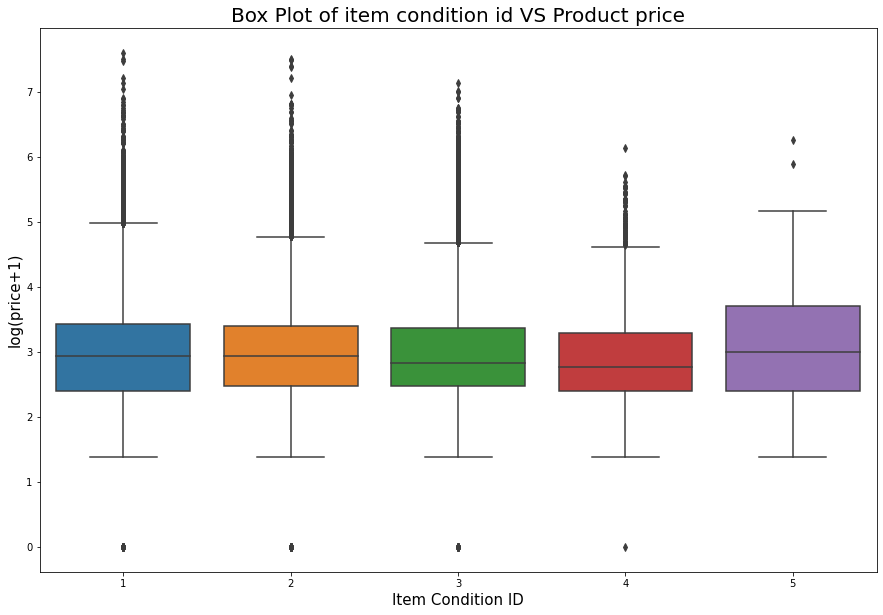

In [76]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=data1['item_condition_id'], y=np.log1p(data1.price))
plt.title('Box Plot of item condition id VS Product price',fontsize=20)
plt.xlabel('Item Condition ID',fontsize=15)
plt.ylabel('log(price+1)',fontsize=15)
plt.show()

In [77]:
data1.groupby(['item_condition_id'])['price'].agg('median')

item_condition_id
1    18.0
2    18.0
3    16.0
4    15.0
5    19.0
Name: price, dtype: float64

**Insight 1 from Item Condition:**

- The median of Item condition as 5 is higher than the others which states that items with item condition 5 were more expensive than others

### Item Condition For every Main Category

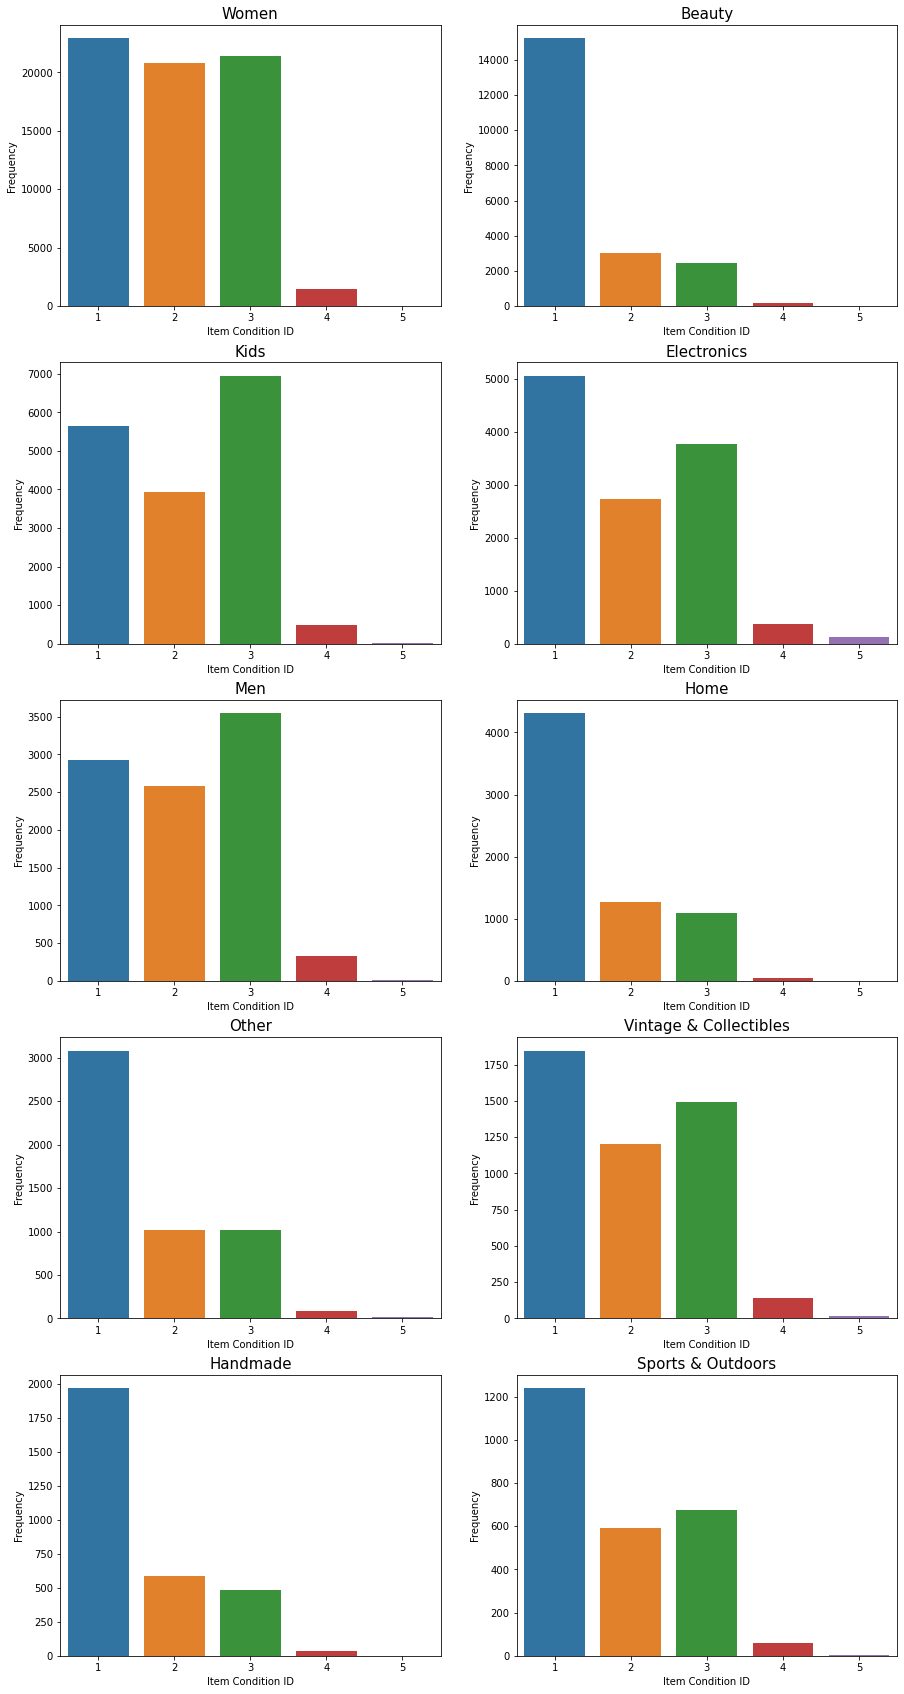

In [78]:
from collections import Counter
index = []
[index.append(key) for key, value in Counter(data1['Main_categ']).most_common()]


f,axes = plt.subplots(5, 2, figsize=(15, 30))

for i in range(data1['Main_categ'].nunique()):
    sns.countplot(data1[data1['Main_categ'] == index[i]]['item_condition_id'], ax = axes[int(i/2)][i%2])
    axes[int(i / 2)][i % 2].set_title(index[i],fontsize=15)
    axes[int(i / 2)][i % 2].set_xlabel('Item Condition ID')
    axes[int(i / 2)][i % 2].set_ylabel('Frequency')

**Insight 2 for Item Condition:**

- Item condition marked as 1, 2 and 3 are most frequent in `Women`, `Kids`, `Men` and `Vintage` category
- Item condition marked as 4 and 5 are bought significantly less amount of times
- `Beauty` and `Handmade` categories have too many Item condition id as 1 as compared to other Item Condition ID
- The most number of poor items which marked as 5 are found in the `Electronics` category

### Item Condition for Top 10 brands

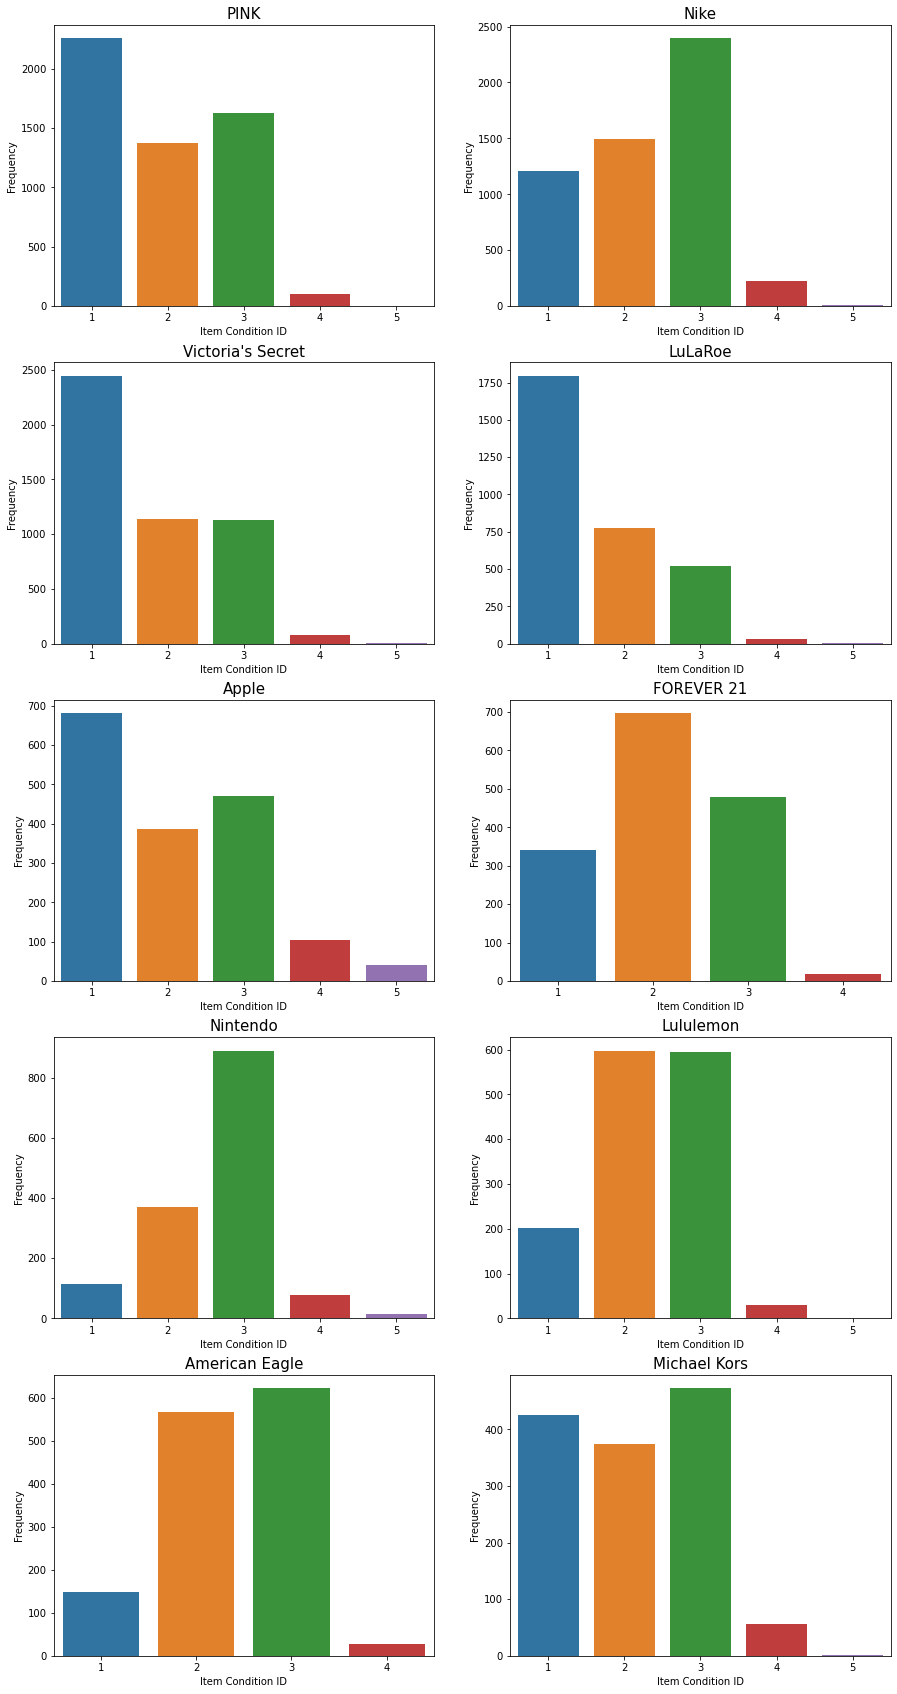

In [79]:
from collections import Counter
temp=data1[data1['brand_name']!='Unknown']
index = []
[index.append(key) for key, value in Counter(temp['brand_name']).most_common()]
top_10 = index[:10]
temp2 = temp[temp['brand_name'].isin(top_10)]

f,axes = plt.subplots(5, 2, figsize=(15, 30))

for i in range(temp2['brand_name'].nunique()):
    sns.countplot(temp2[temp2['brand_name'] == index[i]]['item_condition_id'], ax = axes[int(i/2)][i%2])
    axes[int(i / 2)][i % 2].set_title(index[i],fontsize=15)
    axes[int(i / 2)][i % 2].set_xlabel('Item Condition ID')
    axes[int(i / 2)][i % 2].set_ylabel('Frequency')

**Insight 3 from Item Condition ID:**

- Brands like `Pink`, `Nike` and `Michael Kors` have more number of New(1) to Good(3) condition items as compared to other brands
- `American Eagle` doesn't have a single product of poor quality(5)
- `Apple` has the most number of poor quality(5) products

# Step 2 : Applying Machine Learning Models

Coming to our actual problem, we will be now applying machine learing models to give us a price that we should suggest to the seller. As discussed earlier, this is a regression problem, so we will be applying some regressions models based on our data and other factors that we will face during solving.

**As we know that nothing is free in this world so we can say that price of data being zero is not possible. We observed that there are some rows which have `price` as 0. Hence we remove those rows**

In [14]:
data2 = data1.loc[data1['price'] > 0]

In [15]:
data2.head()

train_id                                      name  item_condition_id  \
0         0                      Hero 77 fountain pen                  2   
1         1                  14K Yellow Gold Earrings                  3   
2         2  New balance 2-in 1 size S dry fit shorts                  2   
3         3   Zella black workout tank w mesh cut out                  3   
4         4       NWT Lilly Pulitzer gabby dress sz 8                  1   

                          category_name      brand_name  price  shipping  \
0         Other/Office supplies/Writing         Unknown   12.0         1   
1                Women/Jewelry/Earrings         Unknown   20.0         0   
2         Women/Athletic Apparel/Shorts     New Balance   10.0         0   
3  Women/Athletic Apparel/Shirts & Tops           Zella   15.0         1   
4        Women/Dresses/Above Knee, Mini  Lilly Pulitzer   75.0         0   

                                    item_description Main_categ  \
0  For sale a brand new Hero 77 fountain pen, doe...      Other   
1  14k black Onyx earrings Good condition Final sale      Women   
2  Brand new never worn, but I tore the tag off w...      Women   
3       Zella black workout tank with mesh cut outs.      Women   
4                            New with tags!! Size 8.      Women   

         sub_categ1        sub_categ2  
0   Office supplies           Writing  
1           Jewelry          Earrings  
2  Athletic Apparel            Shorts  
3  Athletic Apparel     Shirts & Tops  
4           Dresses  Above Knee, Mini

**Seperating dependent and independent variables**

In [16]:
feature_cols = ['item_condition_id', 'Main_categ', 'sub_categ1','sub_categ2', 'brand_name', 'shipping']
x = data2[feature_cols] # Independent variables
y = np.log(data2['price']) # Dependent variable

**Performing One hot encoding on categorical variables**

In [17]:
cat_name = pd.get_dummies(data2["Main_categ"], drop_first=True) # drop_first=True means dropping the redundant column
brd_name = pd.get_dummies(data2["brand_name"], drop_first=True)
sub1_name = pd.get_dummies(data2["sub_categ1"], drop_first=True)
sub2_name = pd.get_dummies(data2["sub_categ2"], drop_first=True)

# removing the categorical columns
x.drop(['Main_categ', 'brand_name','sub_categ1', 'sub_categ2'], axis=1, inplace=True)
x1 = pd.concat([x, cat_name, brd_name, sub1_name, sub2_name], axis=1)

**Spliting the data into train and test to validate the model**

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=10)

## 1. OLS(Ordinary Least Squares Regression) Model:

In [85]:
from statsmodels.api import OLS
regr = OLS(y_train, x_train)
result = regr.fit()
print("Summary of OLS Model:-")
print(result.summary())

Summary of OLS Model:-
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              865.9
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                        0.00
Time:                        13:45:43   Log-Likelihood:                         -94185.
No. Observations:              103718   AIC:                                  1.940e+05
Df Residuals:                  100884   BIC:                                  2.211e+05
Df Model:                        2834                                                  
Covariance Type:            nonrobust                                                  
                                              coef    std err          t      P>|t|      [0.025  

### Important Note:
1. Not always **R-squared** is the best parameter to judge our model as sometimes no matter what we do, we can never get a proper R-squared value because the way in which the data is built. Hence we look after other deciding parameter called RMSLE.
2. We are calling **RMSLE** (Root Mean Squared log Error) instead of `RMSE` because we have taken the log of our dependent variable as it wasn't nomrally distributed.

**Insights from OLS model:**

- As we can see that the R-squared is almost close to 1 which means the predicted value of the training data is very similar to that of the test data
- The 2nd warning tells us that there are strong multi-collinearity problems or that the design matrix is singular because of the one hot encoding and many unique values in our data columns
- Hence this is one of the major drawbacks of this model in our case
- Other factors like Skewness (0.5), Kurtosis (4.7) i.e. almost close to Mesokurtic curve and Auto-correlation (1.99) tell us that model is optimal, however we still can't use this model to know the RMSLE as well as to predict the values
- For predicting the values for testing data we use linear regression and see if we can overcome the OLS model's drawbacks

## 2. Linear Regression Model:

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train) # Predicting the value of train to compare with actual value
y_pred_test = model.predict(x_test) # Predicting the value of test data to compare with actual value

from sklearn.metrics import mean_squared_error
print("RMSLE value of Training Data is {a}".format(a=np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("RMSLE value of Testing Data is {a}".format(a=np.sqrt(mean_squared_error(y_test,y_pred_test))))

RMSLE value of Training Data is 0.5998243479848635
RMSLE value of Testing Data is 2023340540.2473302


**Insights from Linear Model:**
- We can observe that training data has very less rmsle but the testing data the rmsle is extremely high.

**Problem:**
- The data is containing multi-collinearity which can be seen in the RMSLE of testing data

**Solution:**

- Almost 99% of our columns are the dummies representing the categorical data and we cannot remove them and it would be futile to check the VIF of over 3500 columns
- Hence, we have to use algorithms which we can fine tune to optimize our model
- This leads us to a conclusion that there is a need to build models which can help us apply techniques like Dimension reduction, Regularization, Boosting or Bagging. Let's check them out one by one
- In ML, the ideal model is the one which has low bias i.e it can capture true relationship and low variability by producing consistent predictions across different datasets
- The methods used to do this are -

	• Regularization
	• Boosting
	• Bagging 


## 3. Ridge Regression:
 
**Overview:**

- Ridge Regression comes under the Reglarization method
- It provides a way to create a simple model with great explanatory power when number of predictor variables in a dataset are very high and not very significant or when a datset has multi-collinearity
- It uses a type of Shrinkage Parameter called ridge estimator which belongs to a class of L2 regularization (λ)
- L2 regularization adds a penalty which equals the square of the magnitude of co-efficient
- All co-effs are shrunk by the same factor
- When λ = 0, ridge regression equals least squares regression and when λ = infinity, all co-effs are shrunk to 0
- Our goal here is to find the perfect λ value because as λ increases, error due to bias increases and as λ decreases, error due to variance increases

**Note**:- In python, While modelling the **λ** is considered as **alpha**

In [87]:
from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV
# parameters = {"alpha":[0.01,0.1,0,1,10,100]}
# ridgeReg = Ridge(solver = "lsqr", fit_intercept=False)
# lr_reg = GridSearchCV(ridgeReg,param_grid =parameters,n_jobs=-1)
# lr_reg.fit(x_train, y_train)

# By applying GridsearchCV, we get to know that the best parameter for the model is given by
# lr_reg.best_params_
# Output- {'alpha': 0.1}

ridgeReg = Ridge(alpha=0.1,solver="lsqr",fit_intercept=False)
ridgeReg.fit(x_train,y_train)

y_pred = ridgeReg.predict(x_test)
y_pred_train = ridgeReg.predict(x_train)
from sklearn.metrics import r2_score,mean_squared_error
rmse_test_ridge = np.sqrt(mean_squared_error(y_test,y_pred))
rmse_train_ridge = np.sqrt(mean_squared_error(y_train,y_pred_train))
print("RMSLE value of Training Data is {a}".format(a=rmse_train_ridge))
print("RMSLE value of Testing Data is {a}".format(a=rmse_test_ridge))

RMSLE value of Training Data is 0.6130745863069402
RMSLE value of Testing Data is 0.6247986429568546


### Interpretation of RMSLE value:

- It is a way of figuring out how much a model disagrees with the actual data
- The lower this number is, the better the fit of the model
- It is preferred that the value of RMSLE should be close to the minimum value of the response variable in test data 

Checking the min and max values of y_test corresponding to our RMSLE value **0.62**

In [88]:
print('Min value of y_test is',  min(y_test))
print('Max value of y_test is',  max(y_test))

Min value of y_test is 1.0986122886681098
Max value of y_test is 7.498869733976931


**Insight from Ridge Model:**

As we can see that **0.62** is *close* to **1.09**, we can conclude that our model is able to predict the value close to the actual value

## 4. SGD(Stochastic Gradient Descent) Model:

**Overview:**

- In statistics, machine learning and data science fields, we optimize a lot of stuff
- When we fit a line with linear regression, we optimize the slope and intercept
-  In logistic regression, we optimize the squiggly line
- In a similar way Gradient descent also helps optimize such things and much more
- In this case we have almost half billion data points and hence computations can take a long time
- This method uses a randomly selected subset of data at every step rather than full dataset
- This reduces the time spent calculating derivatives of loss function (Sum of squared Residuals)

In [89]:
from sklearn.linear_model import SGDRegressor,Ridge

# parameters = {"alpha": [0.01,0.1,0,1,10,100],
#               "l1_ratio": [0.4,0.5,0.6,0.7,0.8],
#               }
#
# model_sgd = SGDRegressor(loss="squared_loss",penalty="l2",
#                          learning_rate="invscaling",max_iter=100,
#                          fit_intercept=False)
#
# model_SGD = GridSearchCV(model_sgd,param_grid=parameters)
# model_SGD.fit(x_train,y_train)


# By applying GridsearchCV, we get to know that the best parameter for the model is given by
# print(model_SGD.best_params_)
# Output -  {'alpha': 0, 'l1_ratio': 0.4}

model_SGD = SGDRegressor(loss="squared_loss",penalty="l2",
                         learning_rate="invscaling",max_iter=100,
                         fit_intercept=False,alpha=0,l1_ratio=0.4)

model_SGD.fit(x_train,y_train)
y_pred_train_sgd = model_SGD.predict(x_train)
y_pred_test_sgd = model_SGD.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train_sgd))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test_sgd))
print("RMSLE value of Training Data is {a}".format(a=rmse_train))
print("RMSLE value of Testing Data is {a}".format(a=rmse_test))

RMSLE value of Training Data is 0.6344507517916266
RMSLE value of Testing Data is 0.6421330592052263


**Insight from SGD model:**

- We can see that the RMSLE is **0.64** which is slightly greater than the RMSLE in the Ridge Model of **0.62**

## 5. Random Forest Regression Model:

- Decision trees have the possibility of overfitting and have inaccuracy for predictive learning as not all the variables give less impurity at each split
- Also they are not flexible with new data
- This problem is easily overcome by random forests as it combines the simplicity of the decision trees with flexibility resulting in a vast improvement in accuracy
- Bagging method is used to solve the problem we are facing
- Variance decreases because of the sub samples created and 1/3rd of the observations are left for validation purpose

Checking for best Parameters using Grid search - 

In [90]:
# from sklearn.model_selection import RandomizedSearchCV

# param_dist = {'n_estimators': [10,50,100,150,160,200,300],
#                'min_samples_split': [2,3,5,6],
#               "max_depth":[None,10,20,40,60,80]
#               }
# regr1 = RandomForestRegressor()
# n_iter_search = 50
# regr1 = RandomizedSearchCV(regr1, param_distributions=param_dist,
#                             n_iter=n_iter_search, cv=3,n_jobs=-1)

# regr1.fit(x_train, y_train)

# print(regr1.best_params_)
# output - {'n_estimators': 200, 'min_samples_split': 3,'max_depth=40'}

In [19]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_jobs=-1,min_samples_split=3,n_estimators=200,max_depth=40)
model_rf.fit(x_train,y_train)

y_pred_train_rf = model_rf.predict(x_train)
y_pred_test_rf = model_rf.predict(x_test)

from sklearn.metrics import mean_squared_error

rmse_train_rf = np.sqrt(mean_squared_error(y_train,y_pred_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test,y_pred_test_rf))

print("RMSLE value of Training Data is {a}".format(a=rmse_train_rf))
print("RMSLE value of Testing Data is {a}".format(a=rmse_test_rf))

RMSLE value of Training Data is 0.5752236849538379
RMSLE value of Testing Data is 0.6190771439660767


**Insight from Random Forest Model:**

- RMSLE value we obtained here **0.61** is a tiny bit, yet better than the RMSLE we got in Ridge model, thus the best model so far

# Step 3: Final Conclusion

In [1]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Models", "HyperParameters used",  "RMSLE"]

x.add_row(["Ordinary Least Squares Regression", "---", '---'])
x.add_row(["Linear Regression", "---", 2023340540.2473302])
x.add_row(["Ridge Regression", "alpha", 0.62])
x.add_row(["SGD Regressor","alpha, l1_ratio" , 0.64])
x.add_row(["Random Forest Regressor ","n_estimators, min_samples_split, max_depth" , 0.61])

print(x)

+-----------------------------------+--------------------------------------------+--------------------+
|               Models              |            HyperParameters used            |       RMSLE        |
+-----------------------------------+--------------------------------------------+--------------------+
| Ordinary Least Squares Regression |                    ---                     |        ---         |
|         Linear Regression         |                    ---                     | 2023340540.2473302 |
|          Ridge Regression         |                   alpha                    |        0.62        |
|           SGD Regressor           |              alpha, l1_ratio               |        0.64        |
|      Random Forest Regressor      | n_estimators, min_samples_split, max_depth |        0.61        |
+-----------------------------------+--------------------------------------------+--------------------+


- We couldn't find `RMSLE` in OLS model and the Linear model had a very huge value
- **Multi-collinearity** in the data lead us to build models where we could `fine tune` it according to the best parameters provided by **grid search mechanism**
- Out of all the models we applied, **Random Forest Regressor** gave us the `best` and the `lowest` RMSLE value **0.61**
- Hence we can deploy this model at the clients machine so that sellers can get an estimate of the price they should set for their products
- Another solution would be making an app wherein the seller will enter the parameters one by one and after submitting he will get the result as the **Suggested Price** for the inputs provided by him/her